In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df_train= pd.read_csv("C://Users//IMI-KOLKATA//Downloads//Train.csv")

In [4]:
df_test= pd.read_csv("C://Users//IMI-KOLKATA//Downloads//Train.csv")

In [5]:
df_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
df_train_filled = df_train.apply(lambda x: x.fillna(x.mode()[0]))

In [7]:
df_train_filled.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [8]:
df_train_filled.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler


In [10]:
from sklearn.preprocessing import StandardScaler


selected_columns = ['Age', 'Work_Experience', 'Family_Size']
scaler = StandardScaler()

df_train_filled[selected_columns] = scaler.fit_transform(df_train_filled[selected_columns])


In [11]:
df_train_filled.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,-1.284623,No,Healthcare,-0.451136,Low,0.785536,Cat_4,D
1,462643,Female,Yes,-0.327151,Yes,Engineer,-0.451136,Average,0.122735,Cat_4,A
2,466315,Female,Yes,1.408268,Yes,Engineer,-0.451136,Low,-1.202868,Cat_6,B
3,461735,Male,Yes,1.408268,Yes,Lawyer,-0.757410,High,-0.540066,Cat_6,B
4,462669,Female,Yes,-0.207467,Yes,Entertainment,-0.451136,High,2.111139,Cat_6,A


In [12]:
from sklearn.preprocessing import LabelEncoder
b=["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"]
le = LabelEncoder()
for i in b:
 df_train_filled[i]=le.fit_transform(df_train_filled[i])


In [13]:
df_train_filled.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,-1.284623,0,5,-0.451136,2,0.785536,3,3
1,462643,0,1,-0.327151,1,2,-0.451136,0,0.122735,3,0
2,466315,0,1,1.408268,1,2,-0.451136,2,-1.202868,5,1
3,461735,1,1,1.408268,1,7,-0.757410,1,-0.540066,5,1
4,462669,0,1,-0.207467,1,3,-0.451136,1,2.111139,5,0


In [14]:
df_train_filled.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [15]:

x=df_train_filled[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']]

In [16]:
Y=df_train_filled['Segmentation']

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier()
dt = dt.fit(x,Y)

In [18]:
dt.fit(x,Y)

DecisionTreeClassifier()

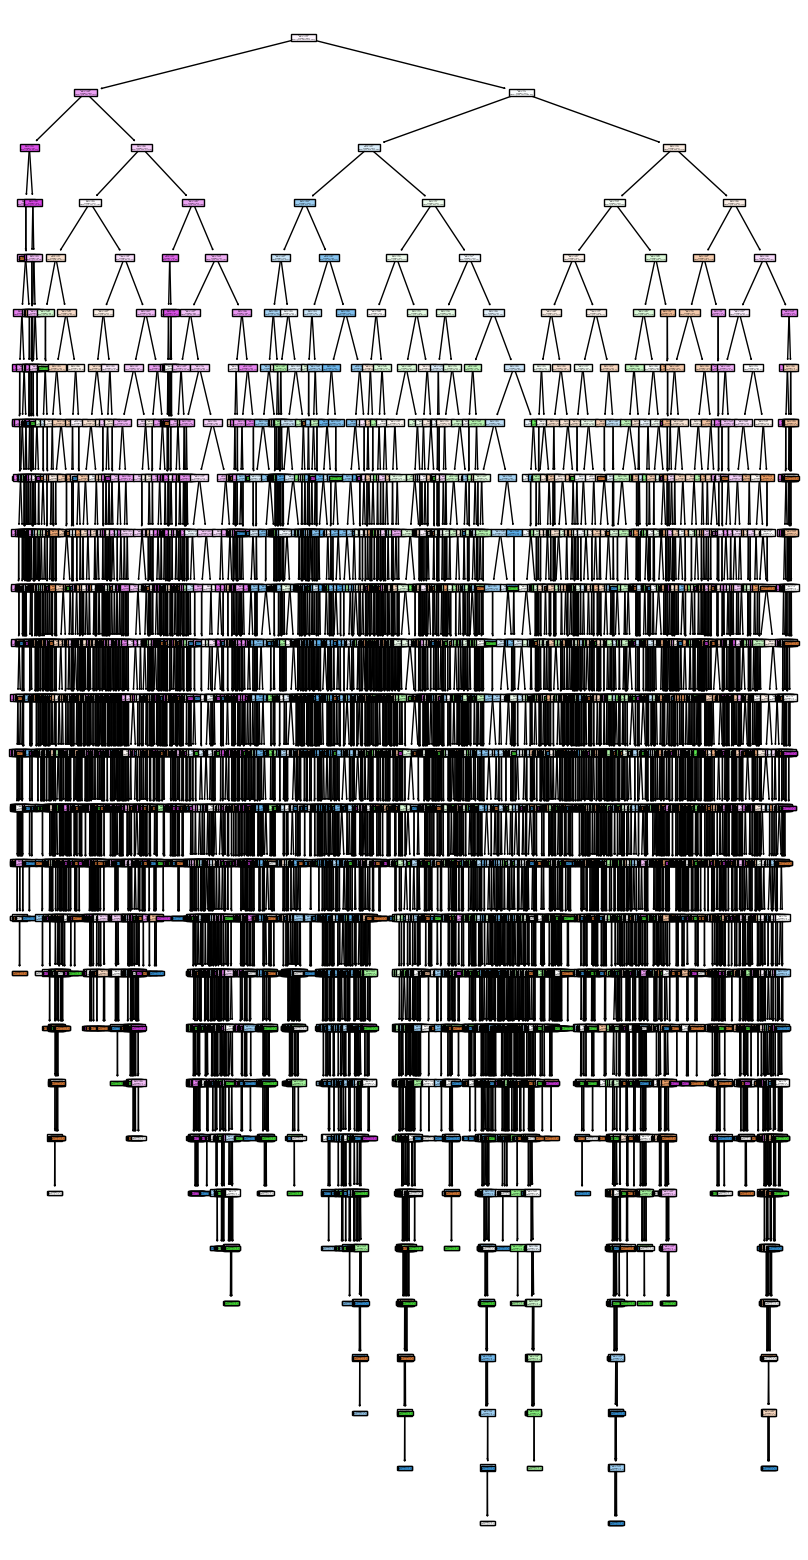

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10, 20))
_ = tree.plot_tree(dt, filled=True)
plt.show()


In [20]:
df_TEST_filled = df_test.apply(lambda x: x.fillna(x.mode()[0]))

In [21]:
from sklearn.preprocessing import StandardScaler


selected_columns = ['Age', 'Work_Experience', 'Family_Size']
scaler = StandardScaler()

df_TEST_filled[selected_columns] = scaler.fit_transform(df_TEST_filled[selected_columns])


In [22]:
from sklearn.preprocessing import LabelEncoder
b=["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"]
le = LabelEncoder()
for i in b:
 df_TEST_filled[i]=le.fit_transform(df_TEST_filled[i])

In [23]:
x_TEST=df_TEST_filled[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']]

In [24]:
y_TEST=df_TEST_filled['Segmentation']

In [25]:
y_TEST


0       3
1       0
2       1
3       1
4       0
       ..
8063    3
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 8068, dtype: int32

In [26]:
Y_PRED=dt.predict(x_TEST)

In [27]:
Y_PRED

array([3, 0, 0, ..., 3, 1, 1])

In [28]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

p = precision_score(y_TEST, Y_PRED, average='micro')
r = recall_score(y_TEST, Y_PRED, average='micro')
a = accuracy_score(y_TEST, Y_PRED)
f1 = f1_score(y_TEST, Y_PRED, average='micro')


In [29]:
p

0.947942488844819

In [30]:
r

0.947942488844819

In [31]:
a

0.947942488844819

In [32]:
f1

0.947942488844819

In [34]:
df1=pd.read_csv("C://Users//IMI-KOLKATA//Downloads//Test.csv")

In [35]:
df1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [36]:
df1= df1.apply(lambda x: x.fillna(x.mode()[0]))

In [37]:
from sklearn.preprocessing import StandardScaler


selected_columns = ['Age', 'Work_Experience', 'Family_Size']
scaler = StandardScaler()

df1[selected_columns] = scaler.fit_transform(df1[selected_columns])

In [38]:
df1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,-0.450948,Yes,Engineer,-0.748105,Low,-1.172097,Cat_6,B
1,458994,Male,Yes,-0.391999,Yes,Healthcare,1.752242,Average,0.792450,Cat_6,A
2,458996,Female,Yes,1.494372,No,Artist,-0.748105,Low,-1.172097,Cat_6,A
3,459000,Male,Yes,0.904881,No,Executive,2.689872,High,-0.517248,Cat_6,B
4,459001,Female,No,-1.453083,No,Marketing,-0.435562,Low,0.792450,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,-0.863592,No,Healthcare,2.064785,Low,0.792450,Cat_6,B
2623,467958,Female,No,-0.509897,Yes,Doctor,-0.435562,Low,-1.172097,Cat_6,A
2624,467960,Female,No,0.551187,Yes,Entertainment,-0.435562,Low,-0.517248,Cat_6,C
2625,467961,Male,Yes,0.197492,Yes,Executive,-0.435562,High,1.447299,Cat_4,C


In [39]:
from sklearn.preprocessing import LabelEncoder
b=["Gender","Ever_Married","Graduated","Spending_Score","Var_1","Profession"]
le = LabelEncoder()
for i in b:
 df1[i]=le.fit_transform(df1[i])

In [40]:
df1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0,1,-0.450948,1,2,-0.748105,2,-1.172097,5,B
1,458994,1,1,-0.391999,1,5,1.752242,0,0.792450,5,A
2,458996,0,1,1.494372,0,0,-0.748105,2,-1.172097,5,A
3,459000,1,1,0.904881,0,4,2.689872,1,-0.517248,5,B
4,459001,0,0,-1.453083,0,8,-0.435562,2,0.792450,5,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,-0.863592,0,5,2.064785,2,0.792450,5,B
2623,467958,0,0,-0.509897,1,1,-0.435562,2,-1.172097,5,A
2624,467960,0,0,0.551187,1,3,-0.435562,2,-0.517248,5,C
2625,467961,1,1,0.197492,1,4,-0.435562,1,1.447299,3,C


In [41]:
Y_PRE=dt.predict(df1)

C:\Users\IMI-KOLKATA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ID
- Segmentation
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'B'

In [42]:
Y_PRE

NameError: name 'Y_PRE' is not defined